In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

### Load Data and Labels

In [3]:
data = np.load('/content/drive/MyDrive/Colab Notebooks/training/data.npy')
labels = np.load('/content/drive/MyDrive/Colab Notebooks/training/target.npy')

In [4]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


### Splitting training and testing dataset


In [5]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [6]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


### Converting labels to onehot encoding

In [7]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

### Building the model

In [8]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [9]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
epochs = 16
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/16
981/981 [==============================] - 37s 5ms/step - loss: 3.2954 - accuracy: 0.2964 - val_loss: 0.6506 - val_accuracy: 0.8387
Epoch 2/16
981/981 [==============================] - 4s 4ms/step - loss: 1.0087 - accuracy: 0.7083 - val_loss: 0.3375 - val_accuracy: 0.9018
Epoch 3/16
981/981 [==============================] - 4s 4ms/step - loss: 0.6317 - accuracy: 0.8123 - val_loss: 0.2017 - val_accuracy: 0.9410
Epoch 4/16
981/981 [==============================] - 4s 4ms/step - loss: 0.4653 - accuracy: 0.8622 - val_loss: 0.1517 - val_accuracy: 0.9580
Epoch 5/16
981/981 [==============================] - 4s 4ms/step - loss: 0.4026 - accuracy: 0.8802 - val_loss: 0.1351 - val_accuracy: 0.9611
Epoch 6/16
981/981 [==============================] - 4s 4ms/step - loss: 0.3542 - accuracy: 0.8924 - val_loss: 0.1725 - val_accuracy: 0.9524
Epoch 7/16
981/981 [==============================] - 4s 4ms/step - loss: 0.3544 - accuracy: 0.8967 - val_loss: 0.1101 - val_accuracy: 0.9682
Epoch

### Saving the model

In [11]:
model.save("my_model.h5")

### Plotting the graphs for accuracy

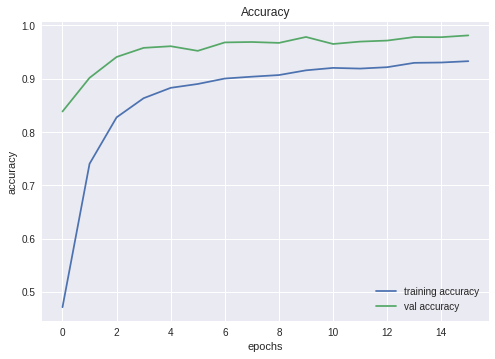

In [12]:
plt.style.use('seaborn')
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

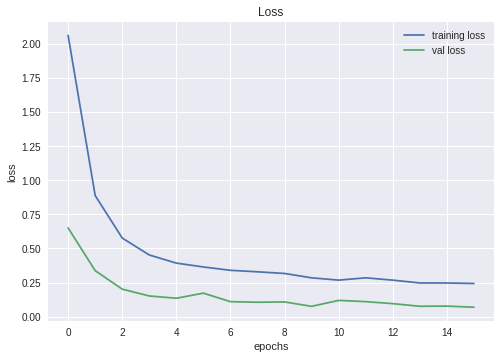

In [13]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## Saving our model for testing

In [21]:
model.save('traffic_sign_model.h5') 

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 64)          0